# Fluid Dynamics

Here we will look at an example of a system that appears in models of fluid dynamics. This system provides us with an example of why it can be so hard to develop general software to obtain solutions to partial differential equations: different systems can exhibit drastically different behavior and numerical stability properties.

We will explore the so-called Burgers' equation, which models viscous fluid flow. The Burgers' equation is a simplified one-dimensional form of the incompressible Navier-Stokes equations, which are useful for describing fluids in one-dimensional systems. This can be used as a toy model for fluid flow through pipes, or even a simple model of traffic flow. The Navier-Stokes equations are, in turn, closely related to equations describing other systems you may have encountered, including the Boltzmann equations describing conservation of a phase-space distribution, and the geodesic equation in gravitational systems.

Burgers' equation can be written

$$
\frac{\partial v}{dt} = - v \frac{\partial v}{dx} + \lambda \frac{\partial^2 v}{dx^2}
$$

where the function $v(x,t)$ describes the fluid velocity at a given location. Here we will work to solve this equation in a manner similar to the homework and in class.

Examining this equation, it looks like a combination of the advection and diffusion equations. It behaves accordingly! The second-derivative term describes viscous interactions in the fluid, with $\lambda$ the coefficient of viscosity. The first-derivative term serves to transport the system similar to the advection equation, however the advection speed is now given by the fluid velocity itself, $v$, instead of a constant.

## Initialization

As always, include any initialization below.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

Below is a function template. This function (incorrectly) returns a solution to the advection equation. You will need to correct this to take a timestep in solving Burgers' equation.

Similar to the homework and in class, we will require initial conditions. We will use a sum of two Gaussians, one positive (right-moving) and one negative (left-moving). While the advection equation moves the entire waveform uniformly in one direction, you should find that Burgers' equation shifts the curve depending on its height and sign.

Will use Neumann boundary conditions, setting the derivative to zero, effectively allowing some of the fluid to flow outside of the computational domain. In order to implement these, the derivative of the velocity field will need to be zero at the boundaries. This is implemented below by setting the boundaries to be equivalent to adjacent points.

Modify the function below to solve Burgers' equation. You should use forward differencing (already implemented) and the second-order expression for a centered second derivative encountered in the homework. You should leave the initial conditions and plotting code alone for now. The coefficient of viscosity has been set to $\lambda = 1.0$.

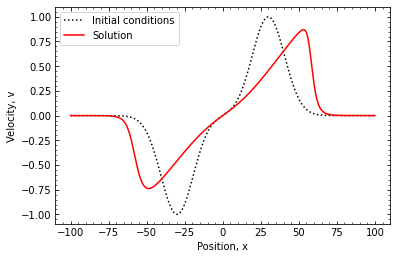

In [9]:
def burgers_step(v, lam, dx, dt) :
    """
    Function to compute the solution to Burgers' equation
    with Neumann boundary conditions.
    
    Accepts parameters:
    v: 1-d array containing velocity function values
    lam: coefficient of viscosity
    dx: spacing between points of v
    dt: size of timestep
    """
    v_new = np.zeros_like(v)
    
    # Forward differencing derivative
    v_deriv = -v[1:-1]*( v[2:] - v[1:-1] ) / dx + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2
    
    # Forward-Euler time step for all points except the boundaries
    # This returns a solution to the advection equation - you should modify this!
    v_new[1:-1] = v[1:-1] + dt*v_deriv
    #vnew = vnow + dt*(dv/dt)
    # Apply Neumann boundary conditions (zero derivative)
    v_new[0] = v_new[1]
    v_new[-1] = v_new[-2]
    
    return v_new

# Grid of x-points
Nx = 201
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 1
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v_ini, 'k:', label="Initial conditions")
plt.plot(xs, v, 'r-', label="Solution")
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.legend()

## Exploring numerical convergence

While the advection equation transported the entire profile in one direction, you should see that the profile has been moved according to the sign and magnitude of the velocity for Burgers' equation. Due to the diffusion term, the solution has also decreased in amplitude and spread out slightly.

We would now like to explore how "well-converged" our solution is. Below, vary the number of x-points, `Nx`. Above, this is set to `Nx = 201` and provided to the `linspace` command, giving $\Delta x = 1$. Double this to `Nx = 401` so $\Delta x = 0.5$, and half to `Nx = 101` so $\Delta x = 2$. Plot all of these curves simultaneously. As the resolution increases, the solution should appear to be "converging". Note that, because $\Delta t$ is written in terms of $\Delta x$, the timestep resolution is also increased when we do this, so we are testing increases in both the spatial and timestep resolutions. *Note: You may notice something odd happens at the lowest resolution; we will explore this more below.*

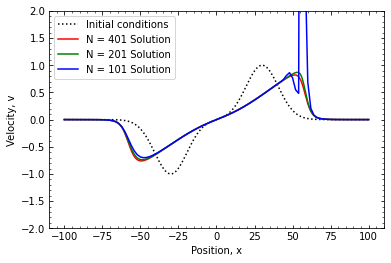

In [10]:
# Grid of x-points
Nx = 401
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 1
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v_ini, 'k:', label="Initial conditions")
plt.plot(xs, v, 'r-', label="N = 401 Solution")

# Grid of x-points
Nx = 201
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 1
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'g-', label="N = 201 Solution")
# Grid of x-points
Nx = 101
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 1
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'b-', label="N = 101 Solution")
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.ylim(-2,2)
plt.legend()
plt.show()

## Stability in the presence of a shock

We would also like to know if our solution is stable as we vary $\lambda$. Keeping the original resolution Produce a plot with solutions for three different values, $\lambda \in \{1, 0.5, 0\}$. You may choose any resolution you like. For the $\lambda = 0$ case, you should find that the solution fails, regardless of resolution! (In fact, lower resolutions may work better!)

<ipython-input-9-a1ddd929bf55>:15: RuntimeWarning: overflow encountered in multiply
  v_deriv = -v[1:-1]*( v[2:] - v[1:-1] ) / dx + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2
<ipython-input-9-a1ddd929bf55>:15: RuntimeWarning: invalid value encountered in subtract
  v_deriv = -v[1:-1]*( v[2:] - v[1:-1] ) / dx + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2
<ipython-input-9-a1ddd929bf55>:15: RuntimeWarning: invalid value encountered in add
  v_deriv = -v[1:-1]*( v[2:] - v[1:-1] ) / dx + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2
<ipython-input-9-a1ddd929bf55>:15: RuntimeWarning: invalid value encountered in multiply
  v_deriv = -v[1:-1]*( v[2:] - v[1:-1] ) / dx + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2


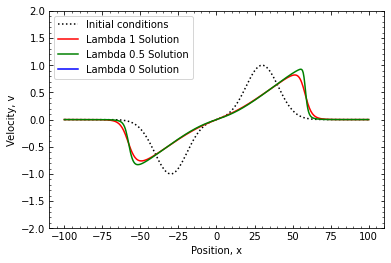

In [11]:
# YOUR CODE HERE
# Grid of x-points
Nx = 401
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 1
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v_ini, 'k:', label="Initial conditions")
plt.plot(xs, v, 'r-', label="Lambda 1 Solution")

# Grid of x-points
Nx = 401
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0.5
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'g-', label="Lambda 0.5 Solution")
# Grid of x-points
Nx = 401
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'b-', label="Lambda 0 Solution")
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.ylim(-2,2)
plt.legend()
plt.show()

What is going on? You should have noticed something unfortunate - the integration method breaks down when $\lambda = 0$.
The reason for the instability in the solution of Burgers' equation is related to the stability discussed in class, however there is a physical complication here: we are encountering a "shock", a discontinuity in the solution across which we may have trouble computing derivatives.

How can we remedy this? In class, we saw that different finite difference methods could result in stable behavior, or not. You may notice, if you vary the resolution above, the solution breaks down only on the right side. So perhaps this instability is related to our choice of finite-differencing method: we used forward differencing, which is asymmetric. As a first attempt to remecy this, we can try to obtain a solution using a centered finite-differencing scheme.

Below, modify the `burgers_step` function to compute a derivative using centered finite differencing. Again show how the solution behaves as you vary the resolution, letting `Nx` be 101, 201, and 401, with $\lambda = 0$.

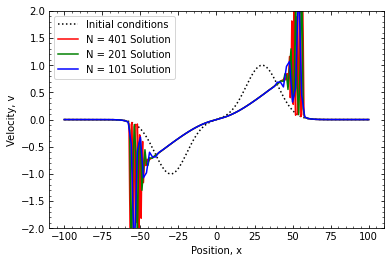

In [12]:
def centered_burgers_step(v, lam, dx, dt) :
    """
    Function to compute the solution to Burgers' equation
    with Neumann boundary conditions.
    
    Accepts parameters:
    v: 1-d array containing velocity function values
    lam: coefficient of viscosity
    dx: spacing between points of v
    dt: size of timestep
    """
    v_new = np.zeros_like(v)
    
    # Forward differencing derivative
    v_deriv = -0.5*v[1:-1]*( v[2:] - v[:-2] ) / dx + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2
    
    # Forward-Euler time step for all points except the boundaries
    # This returns a solution to the advection equation - you should modify this!
    v_new[1:-1] = v[1:-1] + dt*v_deriv
    #vnew = vnow + dt*(dv/dt)
    # Apply Neumann boundary conditions (zero derivative)
    v_new[0] = v_new[1]
    v_new[-1] = v_new[-2]
    
    return v_new
# Grid of x-points
Nx = 401
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = centered_burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v_ini, 'k:', label="Initial conditions")
plt.plot(xs, v, 'r-', label="N = 401 Solution")

# Grid of x-points
Nx = 201
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = centered_burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'g-', label="N = 201 Solution")
# Grid of x-points
Nx = 101
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = centered_burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'b-', label="N = 101 Solution")
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.ylim(-2,2)
plt.legend()
plt.show()

You should find that you can obtain a solution, but there is still some odd behavior! There should be small oscillations of the function with a period close to $\Delta x$. These oscillations are a type of [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon), and often appear in a computational setting where a discontinuity or sharp feature is present. There are a number of remedies when it comes to solving PDEs, but they are often based on two ideas: taking forward or backward finite differences depending on the sign of the velocity, or adding a small amount of "artificial" viscosity proportional to $\Delta x$, which damps the oscillations, but also vanishes as the resolution is changed.

### "Upwind" derivatives

Below, modify the `burgers_step` function in the following manner: compute finite differences using a forward-differencing method when the velocity is negative, and backward-differencing when the velocity is positive. That is,

$$
\partial_x v = \begin{cases} 
      \frac{v(x+\Delta x) - v(x)}{\Delta x} & v \leq 0 \\
      \frac{v(x) - v(x - \Delta x)}{\Delta x} & v > 0 
\end{cases}
$$

This is known as an "upwind" derivative. You should consider how to implement the above using array slicing. As before, plot the solution for several resolutions, and with $\lambda = 0$.

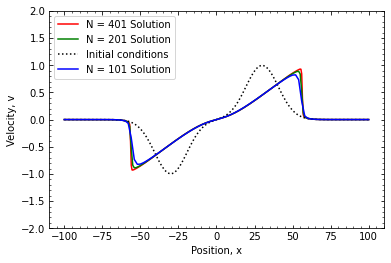

In [13]:
def upwind_burgers_step(v, lam, dx, dt) :
    """
    Function to compute the solution to Burgers' equation
    with Neumann boundary conditions.
    
    Accepts parameters:
    v: 1-d array containing velocity function values
    lam: coefficient of viscosity
    dx: spacing between points of v
    dt: size of timestep
    """
    v_new = np.zeros_like(v)
    
    # Forward differencing derivative
    v_pos = (v>0)*v
    v_neg = (v<=0)*v

    v_pos = v_pos[1:-1]*( -v[:-2] + v[1:-1] ) / dx
    v_neg = v_neg[1:-1]*( v[2:] - v[1:-1] ) / dx

    v_advec = v_pos+v_neg

    
    v_deriv = -v_advec + lam*(v[2:] - 2*v[1:-1]+v[:-2]) / dx**2
    
    # Forward-Euler time step for all points except the boundaries
    # This returns a solution to the advection equation - you should modify this!
    v_new[1:-1] = v[1:-1] + dt*v_deriv
    #vnew = vnow + dt*(dv/dt)
    # Apply Neumann boundary conditions (zero derivative)
    v_new[0] = v_new[1]
    v_new[-1] = v_new[-2]
    
    return v_new
Nx = 401
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = upwind_burgers_step(v, lam, dx, dt)
    
plt.plot(xs, v, 'r-', label="N = 401 Solution")

# Grid of x-points
Nx = 201
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini
for n in range(n_steps) :
    v = upwind_burgers_step(v, lam, dx, dt)

plt.plot(xs, v, 'g-', label="N = 201 Solution")

Nx = 101
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 30
n_steps = int(t_final/dt)
lam = 0
v_ini = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
v = v_ini

for n in range(n_steps) :
    v = upwind_burgers_step(v, lam, dx, dt)
plt.plot(xs, v_ini, 'k:', label="Initial conditions")
plt.plot(xs, v, 'b-', label="N = 101 Solution")
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.ylim(-2,2)
plt.legend()
plt.show()

You should find that the above method is more stable. However, recall that forward and backward finite difference methods are only accurate to $\mathcal{O}(\Delta x)$, while centered differencing is $\mathcal{O}(\Delta x^2)$. While we could explore higher-order versions of forward and backward differencing, there is one more option which allows us to use a centered finite difference method.

### Artificial viscosity

Another option, which can help improve the stability of methods to solve PDEs even more generally, is to introduce a small amount of viscosity, or diffusion, at the level of numerical error of the method. The added viscosity can help to dissipate Gibbs oscillations. We saw above that we can obtain stable solutions with non-zero viscosity, so by adding some small viscosity we can hope to improve stability of our method even when $\lambda = 0$.
The centered differencing error is accurate to second-order, so we will introduce a diffusion term at this level in order to help ensure dissipation of numerical error. For centered-differencing, this correction can be written as

$$
-v*\partial_x v = -v*\frac{v(x+\Delta x) - v(x-\Delta x)}{2 \Delta x} + \Delta x^2 \partial_x^2 v\,.
$$

In other words, we would like to add a factor of $\Delta x^2$ to $\lambda$ in our routine. As we increase the resolution, or decrease $\Delta x$, this term should vanish, and we will be left with the "true" solution. Implement this correction below, and once again plot your solution for several choices of resolution.

In [14]:
# YOUR CODE HERE


More advanced methods for handling shocks are often variants on these ideas. One final idea we will not explore is to monitor the flux (as determined by the fluid velocity) through the boundary of each gridpoint. Instead of using a finite differencing method, we can write a scheme that monitors (and conserves) the flux across boundaries; this is known as a [shock-capturing method](https://en.wikipedia.org/wiki/Shock-capturing_method).

## Member Participation

See Lab 1 for instructions on turning in labs. In the following cell enter the names for each student in the group who partcipated in this lab.

Moses Chung
Jeff Ahlers